In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import random
import WranglerFunctions as wf

from datetime import datetime
from datetime import timedelta

import seaborn as sb

In [2]:
def mergeToOne(df1, df2):
    merge = (df1.merge(df2,how='left', left_on= 'Date', right_on = 'Date'))
    return merge
    
def RenameDateTimeColumnName(df):
    df_dates = df.select_dtypes(include='datetime')
    datetime_columns = df_dates.columns
    
    if len(datetime_columns) == 0:
        df.reset_index(inplace=True)
        df_dates = df.select_dtypes(include='datetime')
        datetime_columns = df_dates.columns
        
    df_date_column_name = datetime_columns[0]
        
    if df_date_column_name != 'Date':
        df.rename(columns = {df_date_column_name : 'Date'}, inplace = True)
        
def fillInNanValues(df):
    return df.bfill().ffill()
    

In [3]:
def createDailyDataframe(start_date, end_date):
    df_dates = pd.date_range(start = start_date, end = end_date)
    df = df_dates.to_frame(name = 'Date')
    df.index = range(len(df))
    return df

def addNewDataframe(total_df, new_df, new_df_name):
    if new_df_name != "":
        new_df = new_df.add_prefix(new_df_name + "_")                        #adds df name as prefix to all its columns
    RenameDateTimeColumnName(new_df) #finds and renames date column to the same as the whole table
    total_df = mergeToOne(total_df, new_df)
    return total_df

In [4]:
initial_start_date = '01/01/1990'
initial_end_date   = '12/04/2022'
whole_df = createDailyDataframe(initial_start_date, initial_end_date)

#### Adding Commodities

In [5]:
CL1_COMB_Comodity  =  wf.format_commodity_data_of_form_DATES_AND_PX_LAST('CL1_COMB_Comodity')     #Crude Oil
whole_df            = addNewDataframe(whole_df, CL1_COMB_Comodity, "CL1_COMB_Comodity")

LMAHDS03_LME_Comdty  =  wf.format_commodity_data_of_form_DATES_AND_PX_LAST('LMAHDS03_LME_Comdty') #Aluminium
whole_df            = addNewDataframe(whole_df, LMAHDS03_LME_Comdty, "LMAHDS03_LME_Comdty")

LMPBDS03_LME_Comdty  =  wf.format_commodity_data_of_form_DATES_AND_PX_LAST('LMPBDS03_LME_Comdty') #Lead
whole_df            = addNewDataframe(whole_df, LMPBDS03_LME_Comdty, "LMPBDS03_LME_Comdty")

LMSNDS03_LME_Comdty  =  wf.format_commodity_data_of_form_DATES_AND_PX_LAST('LMSNDS03_LME_Comdty') #Tin
whole_df            = addNewDataframe(whole_df, LMSNDS03_LME_Comdty, "LMSNDS03_LME_Comdty")

LMCADS03_LME_Comdty  =  wf.format_commodity_data_of_form_DATES_AND_PX_LAST('LMCADS03_LME_Comdty') #Copper
whole_df            = addNewDataframe(whole_df, LMCADS03_LME_Comdty, "LMCADS03_LME_Comdty")

LMNIDS03_LME_Comdty  =  wf.format_commodity_data_of_form_DATES_AND_PX_LAST('LMNIDS03_LME_Comdty') #Nickel
whole_df            = addNewDataframe(whole_df, LMNIDS03_LME_Comdty, "LMNIDS03_LME_Comdty")

LMCODY_LME_Comdty  =  wf.format_commodity_data_of_form_DATES_AND_PX_LAST('LMCODY_LME_Comdty')     #Cobalt -> Only goes to 05/31/2010
whole_df            = addNewDataframe(whole_df, LMCODY_LME_Comdty, "LMCODY_LME_Comdty")

LTBMPRIN_Index  =  wf.format_commodity_data_of_form_DATES_AND_PX_LAST('LTBMPRIN_Index')           #Lithium -> Only goes to 2009 
whole_df            = addNewDataframe(whole_df, LTBMPRIN_Index, "LTBMPRIN_Index")

          Dates  PX_LAST
0    04/05/2022   104.33
1    03/31/2022   100.28
2    02/28/2022    95.72
3    01/31/2022    88.15
4    12/31/2021    75.21
..          ...      ...
296  08/29/1997    19.61
297  07/31/1997    20.14
298  06/30/1997    19.80
299  05/30/1997    20.88
300  04/30/1997    20.21

[301 rows x 2 columns]
          Dates  PX_LAST
0    04/04/2022   3447.0
1    03/31/2022   3491.0
2    02/28/2022   3368.5
3    01/31/2022   3021.0
4    12/31/2021   2807.5
..          ...      ...
296  08/29/1997   1631.5
297  07/31/1997   1700.0
298  06/30/1997   1598.0
299  05/30/1997   1619.0
300  04/30/1997   1645.0

[301 rows x 2 columns]
          Dates  PX_LAST
0    04/04/2022   2413.0
1    03/31/2022   2416.0
2    02/28/2022   2387.0
3    01/31/2022   2244.5
4    12/31/2021   2304.0
..          ...      ...
296  08/29/1997    652.0
297  07/31/1997    632.0
298  06/30/1997    627.0
299  05/30/1997    633.0
300  04/30/1997    624.0

[301 rows x 2 columns]
          Dates  PX_LAST
0  

C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Merging_Data\WranglerFunctions.py:113: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(location   , index_col=False, names=["Dates", "PX_LAST"])
C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Merging_Data\WranglerFunctions.py:113: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(location   , index_col=False, names=["Dates", "PX_LAST"])


#### Adding Inflation and Unemployment

In [6]:
raw_inflation = pd.read_csv('../../Notebooks/Datasets/Economic_dataset/Inflation.csv')
inflation     = wf.Unemployment_Wrangler(raw_inflation)
whole_df      = addNewDataframe(whole_df, inflation, "")

In [7]:
raw_unemployment = pd.read_csv('../../Notebooks/Datasets/Economic_dataset/Unemployment.csv')
unemployment     = wf.Unemployment_Wrangler(raw_unemployment)
whole_df         = addNewDataframe(whole_df, unemployment, "")

#### Adding SPX500, GUKG10, F3METL, BCOMIN

In [8]:
def renameMultiIndex(df):
    multiIndex = df.columns
    newIndex   = []
    for e in multiIndex:
        string = e[0] + " " + e[1]
        newIndex.append(string)
    df.columns = newIndex
    

#S&P500 index
original_SPX500 = pd.read_csv('../../Notebooks/Datasets/Financial_dataset/SPX500.csv')
SPX500 = wf.SPX500_Wrangler(original_SPX500)
SPX500_important = SPX500[[('SPX500 Index',   'PX_LAST'), ('SPX500 Index', 'PX_VOLUME')]]
renameMultiIndex(SPX500_important)
whole_df         = addNewDataframe(whole_df, SPX500_important, "")

#FTSE 350 Index
F3METL_original = pd.read_csv('../Datasets/Financial_dataset/F3METL.csv', index_col = False)
F3METL          = wf.F3METL_Wrangler(F3METL_original)
F3METL_important  = F3METL[['PX_LAST', 'PX_VOLUME']]
whole_df        = addNewDataframe(whole_df, F3METL_important, "F3METL")

original_data_GUKG10 = pd.read_csv('../../Notebooks/Datasets/Financial_dataset/GUKG10.csv')
GUKG10  = wf.GUKG10_Wrangler(original_data_GUKG10)
GUKG10_important = GUKG10[[('GUKG10 Index',   'PX_LAST')]]
renameMultiIndex(GUKG10_important)
whole_df         = addNewDataframe(whole_df, GUKG10_important, "")

#BCOMIN
original_BCOMIN = pd.read_csv('../../Notebooks/Datasets/Financial_dataset/BCOMIN.csv', index_col=False)
BCOMIN = wf.BCOMIN_Wrangler(original_BCOMIN).set_index('Dates')
BCOMIN_important = BCOMIN[['PX_LAST']]
whole_df       = addNewDataframe(whole_df, BCOMIN_important, 'BCOMIN')

C:\Users\vojno\AppData\Local\Temp\ipykernel_27012\2002061726.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {df_date_column_name : 'Date'}, inplace = True)
C:\Users\vojno\AppData\Local\Temp\ipykernel_27012\2002061726.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {df_date_column_name : 'Date'}, inplace = True)


#### Adding GDP growth

In [9]:
uk_GDP = pd.read_csv('../Datasets/Geography_dataset/uk_GDP.csv', index_col = False)
uk_GDP = wf.gdpWrangler(uk_GDP)
whole_df = addNewDataframe(whole_df, uk_GDP, "UK")

china_GDP = pd.read_csv('../Datasets/Geography_dataset/chinaGDP.csv', index_col = False)
china_GDP = wf.gdpWrangler(china_GDP)
whole_df = addNewDataframe(whole_df, china_GDP, "China")

C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Merging_Data\WranglerFunctions.py:366: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Date"] = pd.to_datetime(df["Date"].str.replace(r'(Q\d) (\d+)', r'\2-\1'), errors='coerce')
C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Merging_Data\WranglerFunctions.py:366: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Date"] = pd.to_datetime(df["Date"].str.replace(r'(Q\d) (\d+)', r'\2-\1'), errors='coerce')


#### Correlation Heatmap to EBITDA

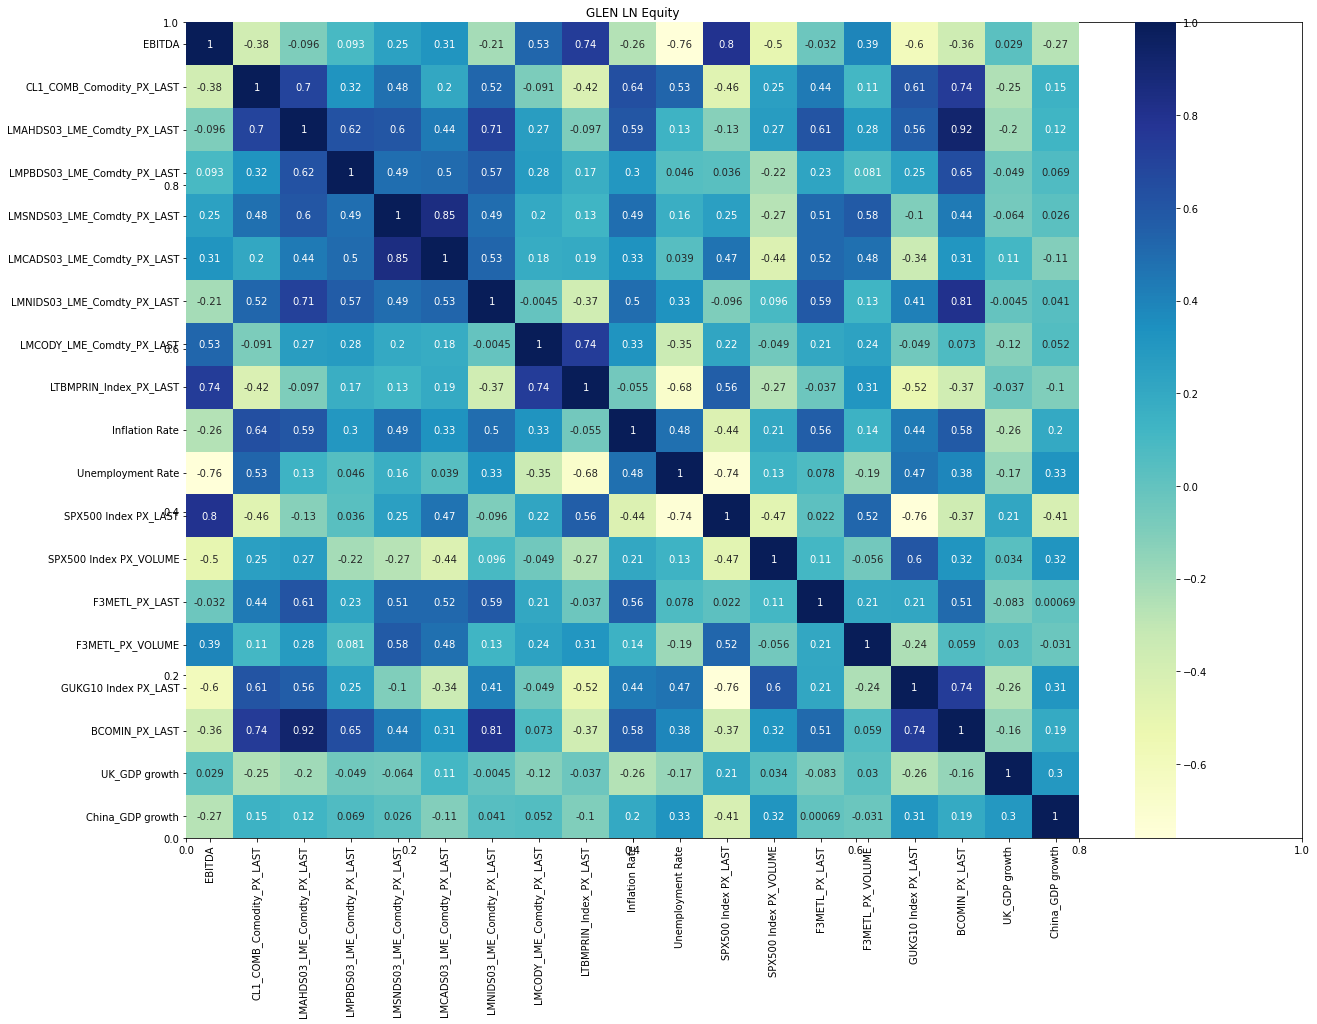

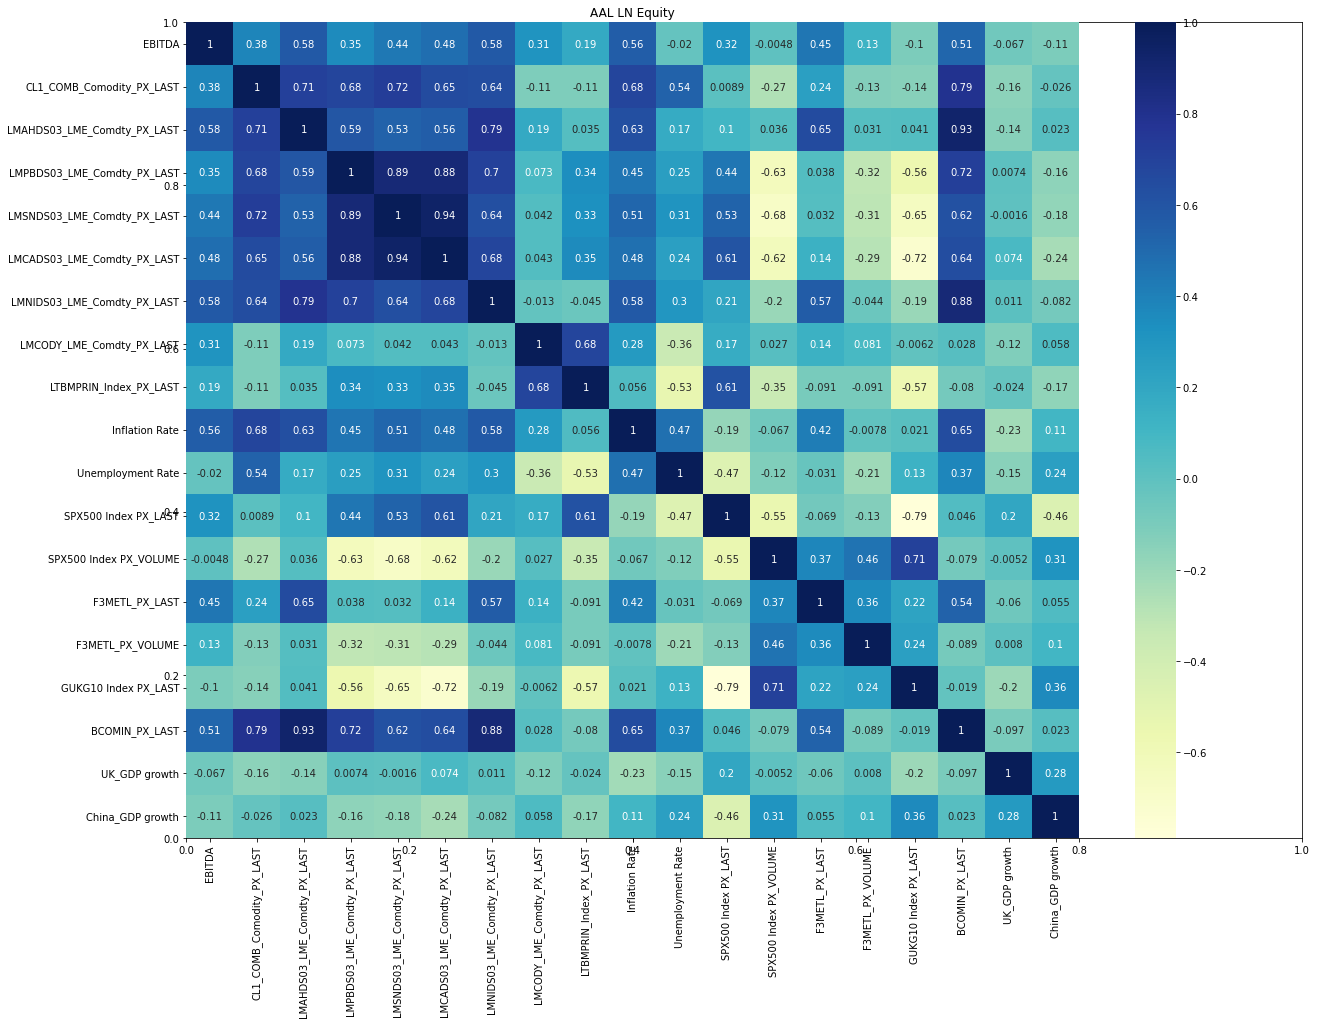

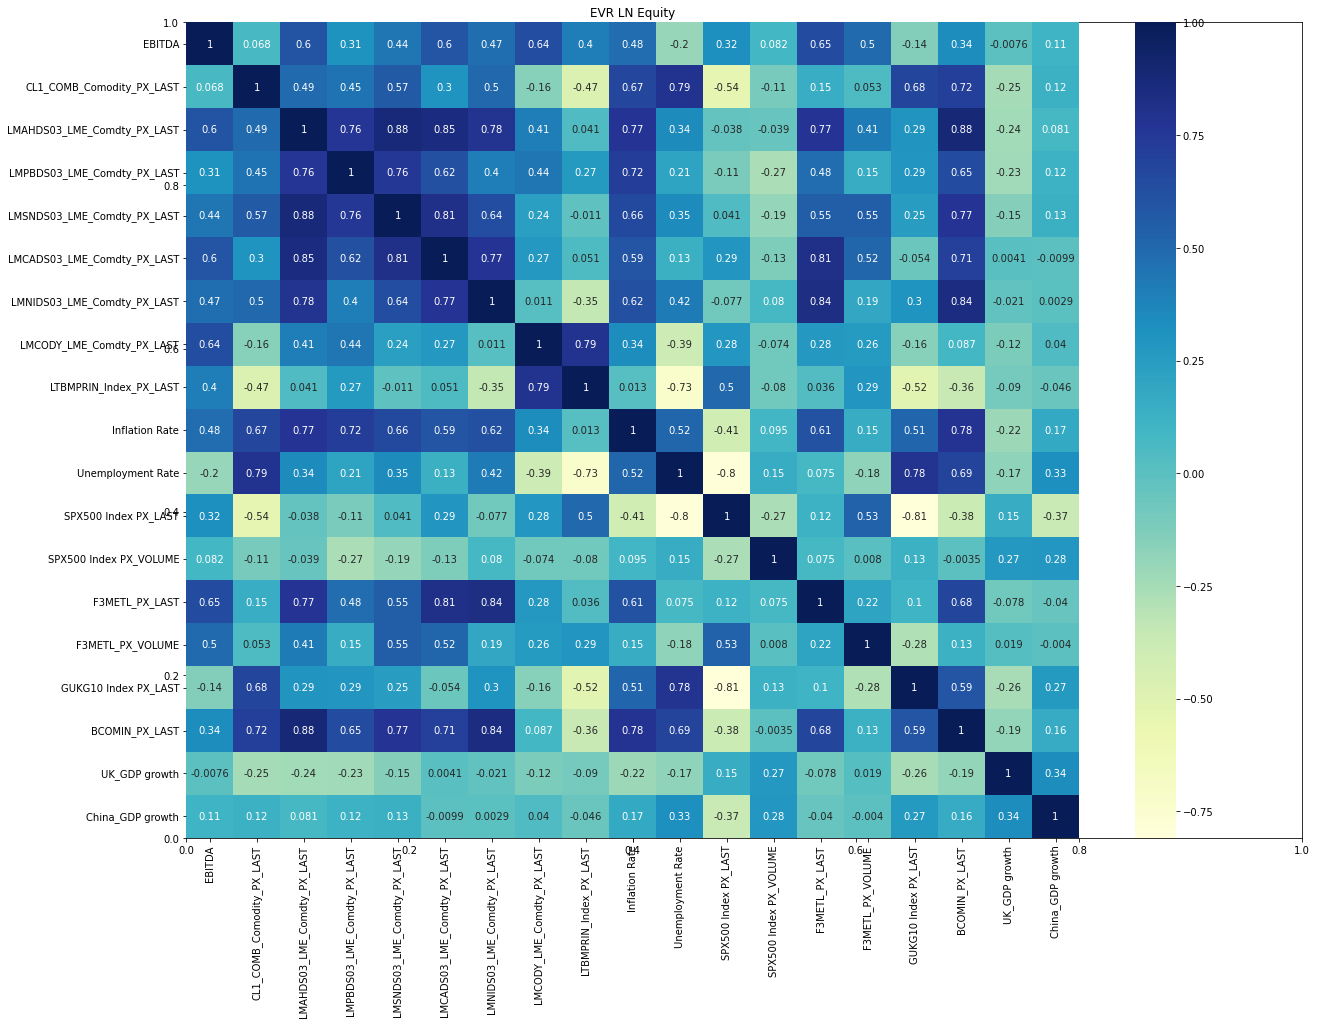

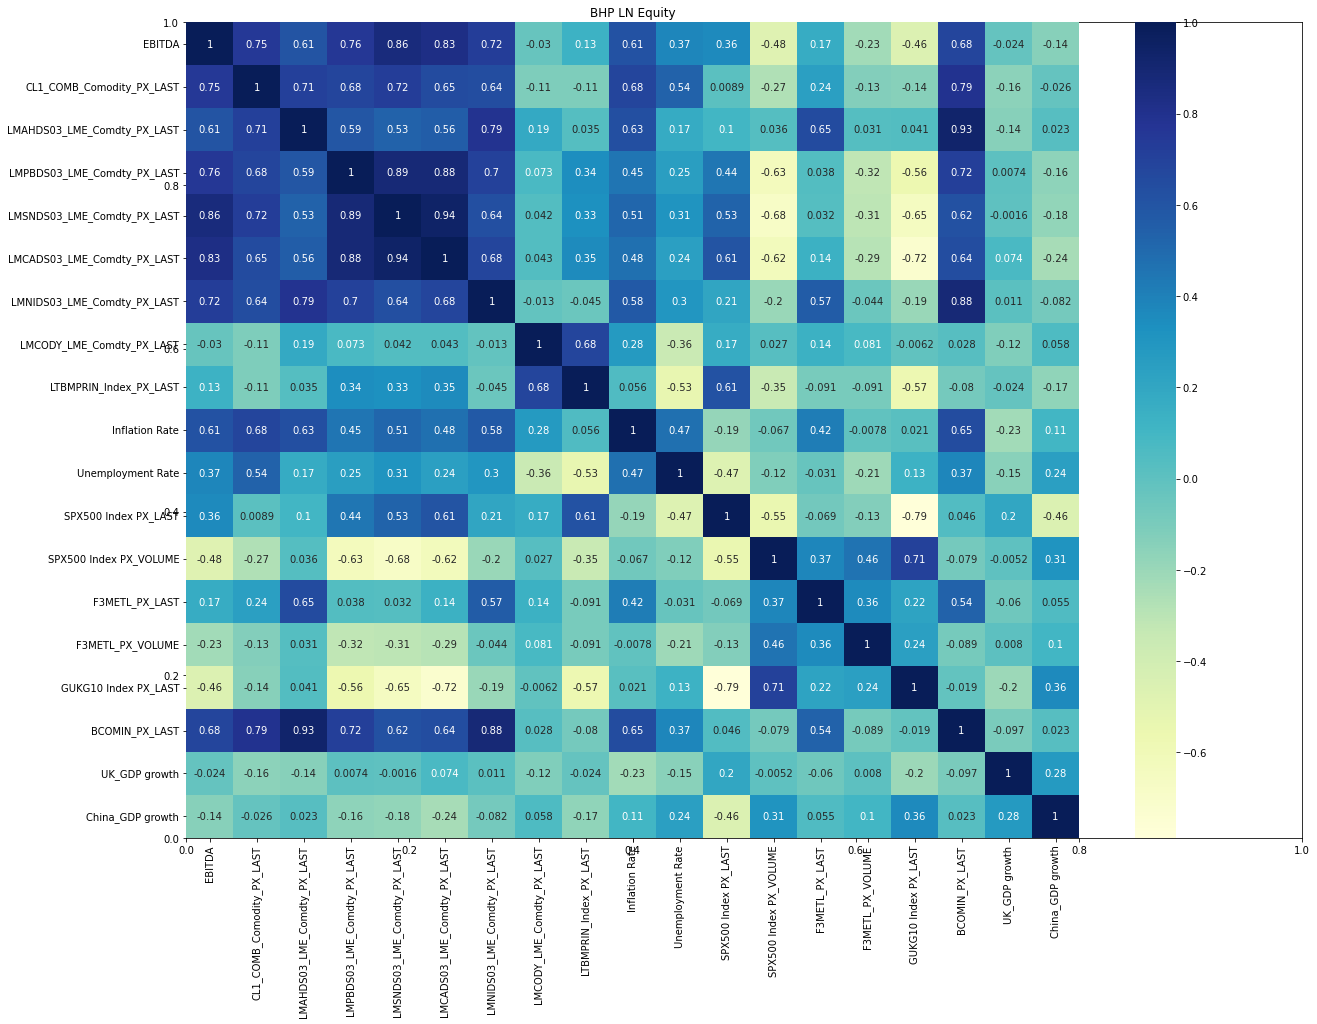

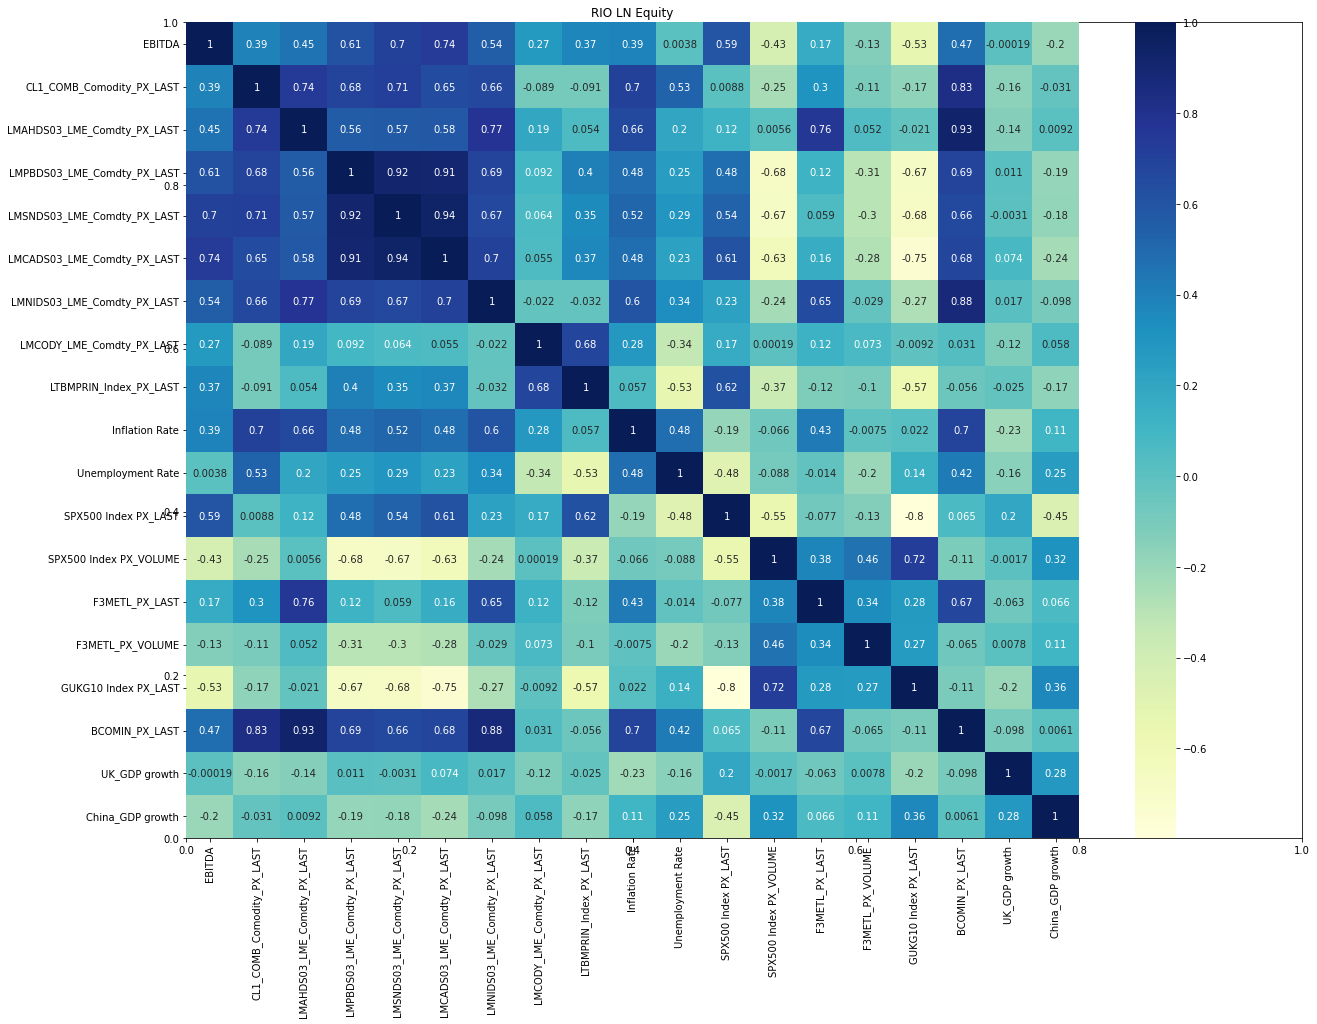

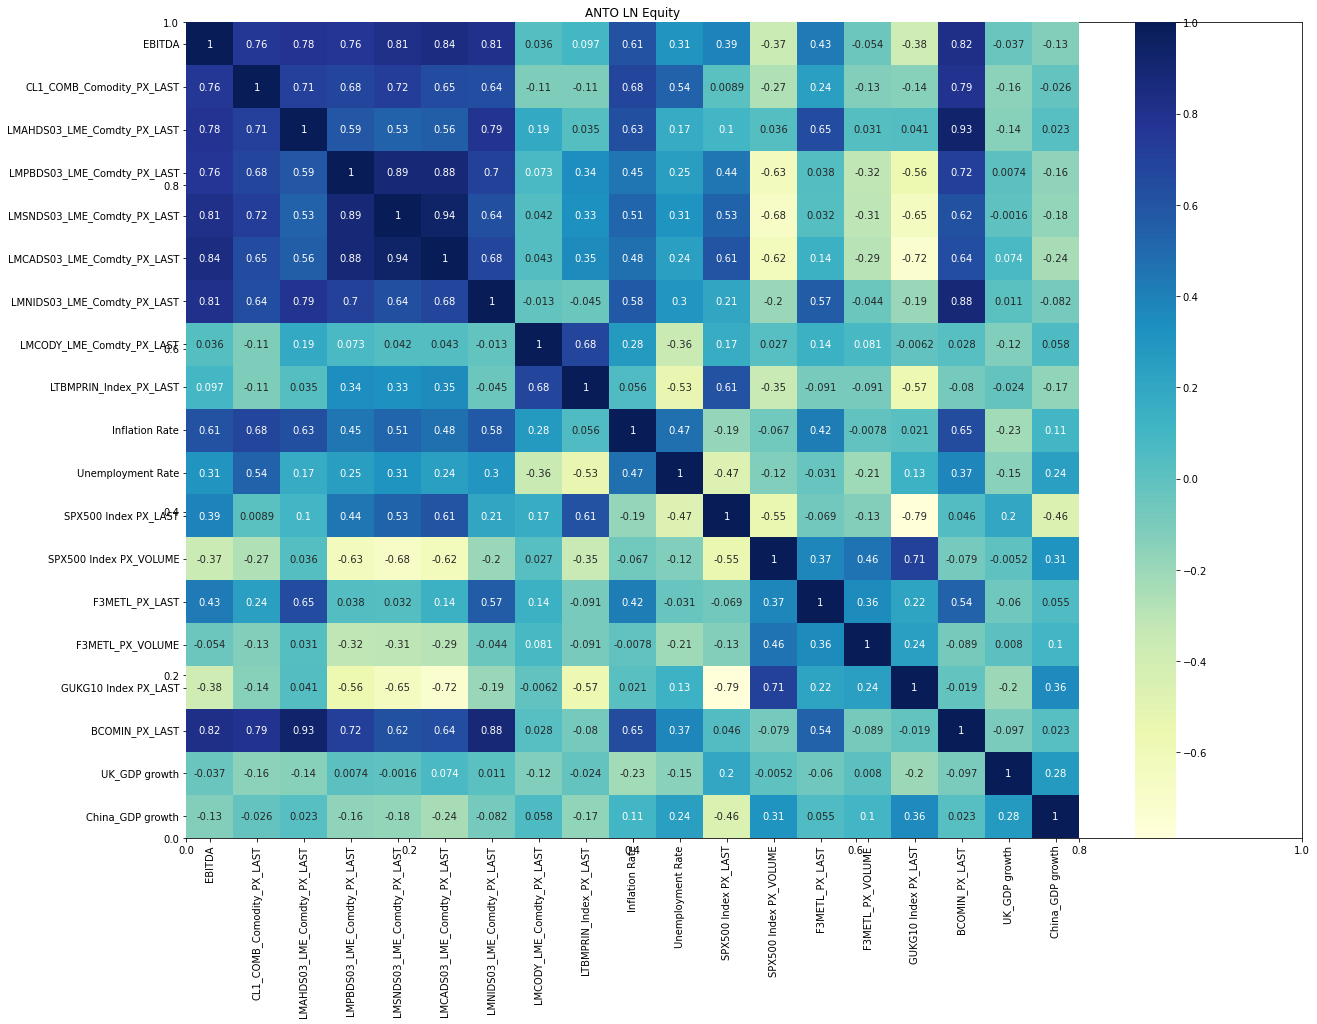

In [10]:
def ConvertAllColumnsToFloat(df):
    columnsToConvert = df.select_dtypes(exclude='float64')
    columnNames = columnsToConvert.columns
    for name in columnNames:
        if name != "Date":
            df[name] = df[name].astype('float64')
    return df     
    #for column_name in columnsToConvert

def getEBITDAUnique(df, companyName): #Stolen from DataExploration
    earnings_unique = df[companyName]['EBITDA'].drop_duplicates()
    earnings_unique = pd.DataFrame(earnings_unique)
    earnings_unique = earnings_unique.dropna()
    earnings_unique = earnings_unique.reset_index()
    return earnings_unique

def singleCompaniesFeatureHeatmap(feature_df, ebitda_df, company):
    feature_df = fillInNanValues(feature_df)  #IMPORTANT -> NEED TO DISCUSS WHETHER FFILL/BFILL IS OK!!!
    feature_df = ConvertAllColumnsToFloat(feature_df)#Some columns have datatype object which .corr() ignores
    companies_ebitda = getEBITDAUnique(ebitda_df, company)
    RenameDateTimeColumnName(companies_ebitda)

    companies_ebitda_vs_features = addNewDataframe(companies_ebitda, feature_df, "")
    plt.subplots(figsize=(20,15))
    ax = plt.axes()
    ax.set_title(company)
    heatmap = sb.heatmap(companies_ebitda_vs_features.corr(), cmap="YlGnBu", annot=True)

companies_financial_dataset = pd.read_csv('../../Notebooks/Datasets/Financial_dataset/F3METL_Comp.csv', index_col = False)
companies_financial_dataset = wf.F3Metl_Comp_Wrangler(companies_financial_dataset)
company_names = list(set(companies_financial_dataset.columns.get_level_values(0)))

for name in company_names:
    singleCompaniesFeatureHeatmap(whole_df, companies_financial_dataset, name)